# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 30th, 2025 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. You should provide solutions to the exercises with the following titles from **Part 1** 

* *Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook*

* *WS edition*

And from **Part 2**

* *BA Edition*.
  * **Note**: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network. 


# Exercise Part 1

> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.
>
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

Random networks' degree distribution follow the Poisson distribution. However, this is not the case for real networks. Also, random networks local clustering coefficient is independent of the node's degree. However, measuring the clustering coefficient of
Internet or protein interactions shows that C(k) decreases with k and dependent on N. Moreover, in theory if <k> > lnN, then the network should be broken into isolated clusters, which is true for the Actor network, but for most real life networks it is false (e.g. the Internet, power grid, yeast protein interaction).

Subsciritcal regime, where 0 < <k> < 1 and the network is fragmented into small clusters, which sizes follows the exponential distribution.
 Critical point, where <k> = 1. In this there are a lot of small clusters (which are mainly trees), and a giant component (which can have loops in it).
 superscritical regime, where <k> > 1. In this there can be a few small cluster (mainly trees), and a giant component with loops in it.
 Connected regime, where <k> > lnN and the giant component swallows all the small clusters.

The problem with random networks not capturing C(k) for real networks as it fails to explain why nodes with high <k> have a smaller C(k) than nodes with low <k>. In contrast in random networks C(k) is not dependent from <k>.


> *Exercises*: WS edition.
>
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one.
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

In [ ]:
import networkx as nx
## Generating 3 graphs with N=500, <k>=4 and p= 0, 0.1 and 1, using`nx.watts_strogatz_graph`. Calculating the average shortest path length <d> for each one.

probabilities = [0, 0.1, 1]
networks = []

print("Average shortest path lengths for the different probabilities:")
for i in range (len(probabilities)):
    g = nx.watts_strogatz_graph(500, 4, probabilities[i])
    networks.append(g)
    print("For probability ", probabilities[i] , " the average shortest path length is: ", nx.average_shortest_path_length(g))

Describe what happens to the network when p = 1:
As p in Watto-Strogatz Model is the probability for each link to rewire to a randomly chosen node, so if p=1 it means that the network becomes a random network. (As the links are random.)

In [ ]:
import random
import matplotlib.pyplot as plt
##Generating a lot of networks with different values of p.

random_probabilities = [random.random() for _ in range(10)]
random_probabilities.sort()
average_shortest_path_lengths = []
for p in random_probabilities:
    g = nx.watts_strogatz_graph(500, 4, p)
    average_shortest_path_lengths.append(nx.average_shortest_path_length(g))

plt.plot(random_probabilities, average_shortest_path_lengths, marker='x')   # line plot with points
plt.xlabel("probabilities")
plt.ylabel("Average shortest path lengths")
plt.title("Plot of two arrays")
plt.show()

0.001‹p‹0.01 is the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

We can also see that the average shortest path is shorter and shorter with probabilities which are closer to 1.


In [ ]:
import numpy as np

N = 500
k = 4
p =[0, 0.01, 0.03, 0.05, 0.1, 0.2]
dictionary = {}
standard_deviations = {}

for i in p:
    average_shortest_path_lengths_with_d = []
    for j in range(50):
        g = nx.watts_strogatz_graph(N, k, i)
        average_shortest_path_lengths_with_d.append(nx.average_shortest_path_length(g))
    standard_deviations[i] = np.std(average_shortest_path_lengths_with_d)
    dictionary[i] = np.mean(average_shortest_path_lengths_with_d)

print(standard_deviations)

In [ ]:
keys = sorted(dictionary.keys())
values = [dictionary[k] for k in keys]
y_error = [standard_deviations[k] for k in keys]

In [ ]:

# Plot with error bars
plt.errorbar(keys, values, yerr=y_error, fmt='-o', capsize=5, label='Standard deviation as error bars')
plt.xlabel("Rewiring Probability")
plt.ylabel("Average shortest path length")
plt.title("Average shortest path length vs Rewiring Probability")
plt.legend()
plt.show()

On this plot we can see the relationship between the rewiring probability. On the y-axis you can see the average shortest path lengths of random generated graphs with the rewiring probability from the x-axis. For the error bars we used the standard deviation of the average shortest path lengths. As we can see the average shortest path length decreases very quickly even with a little bit of rewiring.

# Part 2

In [ ]:
# We made a graph and added two nodes and an edge between them. The name of the nodes will be integers from 0 to n-1.
BA_Graph = nx.Graph()
BA_Graph.add_edge(0, 1)

In [ ]:
# We then added 98 more nodes. Each new node has one edge that connects to the previous nodes. The node to which the new node connects is chosen randomly by their proportion to their degree. This means that in a way that if a node has more connection, there is a bigger change that the new node will connect to that node.

import random
for i in range (2, 100):
    edges = list(BA_Graph.edges()) # list of all edges in the current graph
    flat_edges = [node for edge in edges for node in edge] #I flatten the list of edges, so that each node appears as many times as its degree
    new_node = i # name of the new node
    connected_node = random.choice(flat_edges) # we chosed a random node from the flat_edges list
    BA_Graph.add_edge(new_node, connected_node)

In [ ]:
# visualizing the network
nx.draw_networkx(BA_Graph)

In [ ]:
# I add more nodes, so that in total there are 5000 nodes in the network in the same way as above
for i in range (101, 5000):
    edges = list(BA_Graph.edges())
    flat_edges = [node for edge in edges for node in edge]
    new_node = i
    connected_node = random.choice(flat_edges)
    BA_Graph.add_edge(new_node, connected_node)

In [ ]:
degrees = dict(BA_Graph.degree())
min_degree = min(degrees.values())
max_degree = max(degrees.values())

print("The minimum degree is: ", min_degree)
print("The maximum degree is: ", max_degree)

In [ ]:
# We make a histogram of the degrees_array (degree distribution)
import numpy as np
degrees_array = np.array(list(degrees.values()))
degrees_histogram_linear, degrees_bin_linear = np.histogram(degrees_array, bins=(max_degree - min_degree + 1)) #for bins we used the range of degrees between minimum and maximum degree

In [ ]:
# We plot the degree distribution on a linear scale
import matplotlib.pyplot as plt
plt.plot(degrees_histogram_linear, linestyle = 'dotted')
plt.show()

In [ ]:
# We plot the degree distribution on a log-log scale
degrees_histogram_log, bin_log = np.histogram(degrees_array, bins='auto') # 'auto' lets numpy choose the bin size automatically
bin_centers = 0.5 * (bin_log[1:] + bin_log[:-1])
plt.figure(figsize=(7,5))
plt.scatter(bin_centers, degrees_histogram_log, s=20, c="blue", marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("k")
plt.ylabel("count")
plt.title("Histogram (log-log)")
plt.show()

# Assignment 1.2: Stats and visualization of the Rock Music Network

This second part requires you to have built the network of Rock Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Explain your process in words*

* *Simple network statistics and analysis*.

  * **Note related to this and the following exercise**. It is nice to have the dataset underlying the statistics and visualization available when we grade. Therefore, I recommend that you create a small *network dataset*, which is simply your graph stored in some format that you like (since it's only a few hundred nodes and a few thousand edges, it won't take up a lot of space). You can then place that network one of your group members' GitHub account (or some other server that's available online) and have your Jupyter Notebook fetch that dataset when it runs. (It's OK to use an LLM for help with setting this up, if it seems difficult). 

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

In [82]:
import requests
import os
from urllib.parse import quote
import time
import json
from pathlib import Path
import numpy as np
import re
#We made a wikipediadownloader class that downloads and saves the json version of a wikipedia page

class WikipediaDownloader:
    def __init__(self):
        self.base_url = "https://en.wikipedia.org/w/api.php"

        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        })

    def download_page_html(self, title):
        try:
            params = {
                "action": "query",
                "prop": "revisions",
                "rvprop": "content",
                "format": "json",
                "titles": title.replace(' ', '_'),  # Use the actual title parameter
                "rvslots": "main"
            }
            print(f"Downloading: {title}")
            response = self.session.get(self.base_url, params=params)

            response.raise_for_status()
            return response.text
        except requests.RequestException as e:
            print(f"Error downloading {title}: {e}")
            return None

    def save_page(self, title, content):
        if content is None:
            return False

        # Create directory if it doesn't exist
        os.makedirs("wikipedia_pages", exist_ok=True)

        # Clean filename
        safe_filename = "".join(c for c in title if c.isalnum() or c in (' ', '-', '_')).rstrip()
        filename = f"wikipedia_pages/{safe_filename}.json"

        try:
            with open(filename, 'w', encoding='utf-8') as f:
                f.write(content)
            print(f"Saved: {filename}")
            return filename
        except IOError as e:
            print(f"Error saving {title}: {e}")
            return False

    def download_and_save(self, title):
        content = self.download_page_html(title)

        if content:
            return self.save_page(title, content)
        return False

downloader = WikipediaDownloader()

favorite_pages = [
    "List of mainstream rock performers"
]
for page_title in favorite_pages:
    print(f"\n--- Processing: {page_title} ---")

    # Download HTML version
    file_name = downloader.download_and_save(page_title)
    if(file_name):
        print(f"Successfully downloaded and saved: {file_name}")
    else:
        print(f"Failed to download or save: {page_title}")


--- Processing: List of mainstream rock performers ---
Downloading: List of mainstream rock performers
Saved: wikipedia_pages/List of mainstream rock performers.json
Successfully downloaded and saved: wikipedia_pages/List of mainstream rock performers.json


In [83]:
#We extracted tge artists from the mainstreem rock performers wiki
import json
with open("wikipedia_pages/List of mainstream rock performers.json", "r") as f:
    html_content = f.read()

#we had to decode the json because of the special characters
parsed_json = json.loads(html_content)
page_id = list(parsed_json['query']['pages'].keys())[0]
wiki_text = parsed_json['query']['pages'][page_id]['revisions'][0]['slots']['main']['*']

# Now extract from the properly decoded text
pattern = r'\[\[([^\]|]+)'

In [84]:

import re
# Find the artists and saved them to the artists.txt
matches = re.findall(pattern, wiki_text)

# Optional: remove duplicates and sort
artists = sorted(set(matches))

# Save to a text file
with open("artists.txt", "w", encoding="utf-8") as f:
    for artist in artists:
        f.write(artist + "\n")

print(f"Extracted {len(artists)} artists and saved to artists.txt")

Extracted 492 artists and saved to artists.txt


In [85]:
#We had to remove the last line because it was not an artist
with open("artists.txt", "r") as file:
    lines = file.readlines()

with open("artists.txt", "w") as file:
    for line in lines[:-1]:
        file.write(line)


In [86]:
# Open the file in read mode
artists_file_names = []
with open("artists.txt", "r", encoding="utf-8") as file:
    for line in file:
        artist = line.strip()  # remove leading/trailing spaces and newline
        file_name = downloader.download_and_save(artist)
        if(file_name):
            artists_file_names.append(file_name)
        else:
            print(f"Failed to download or save: {page_title}")

Downloading: 10 Years (band)
Saved: wikipedia_pages/10 Years band.json
Downloading: 10cc
Saved: wikipedia_pages/10cc.json
Downloading: 3 Doors Down
Saved: wikipedia_pages/3 Doors Down.json
Downloading: 311 (band)
Saved: wikipedia_pages/311 band.json
Downloading: 38 Special (band)
Saved: wikipedia_pages/38 Special band.json
Downloading: A Perfect Circle
Saved: wikipedia_pages/A Perfect Circle.json
Downloading: ABBA
Saved: wikipedia_pages/ABBA.json
Downloading: AC/DC
Saved: wikipedia_pages/ACDC.json
Downloading: AFI (band)
Saved: wikipedia_pages/AFI band.json
Downloading: Accept (band)
Saved: wikipedia_pages/Accept band.json
Downloading: Adam Ant
Saved: wikipedia_pages/Adam Ant.json
Downloading: Aerosmith
Saved: wikipedia_pages/Aerosmith.json
Downloading: Air Supply
Saved: wikipedia_pages/Air Supply.json
Downloading: Alanis Morissette
Saved: wikipedia_pages/Alanis Morissette.json
Downloading: Alice Cooper
Saved: wikipedia_pages/Alice Cooper.json
Downloading: Alice Cooper (band)
Saved: wi

In [87]:
#we saved the artists to an artist_array so that it will be easier to iterate through them later
artist_array = []
with open("artists.txt", "r", encoding="utf-8") as file:
    for line in file:
        # Just strip whitespace, don't need to replace parentheses or slashes
        artist_array.append(line.strip())  # remove leading/trailing spaces and newline

In [88]:
# We made a function that checks if an artist is referenced in another artist's wikipedia page
def find_referenced_artists(artist_to_find, current_artist, current_artist_file_name):
    file_path = current_artist_file_name
    with open(file_path, "r", encoding="utf-8") as f:
        wiki_html = f.read()

    # Find all wiki links with regex
    pattern = r"\[\[" + re.escape(artist_to_find) + r"(?:\|[^\]]+)?\]\]"

    if re.search(pattern, wiki_html):
        return True
    else:
        return False

In [89]:
#We made a directed graph and added the artists as nodes and if an artist referenced another artist in his wikipedia page we added a directed edge from the first artist to the second artist.
import networkx as nx
rock_artists_graph = nx.DiGraph()

for artist in artist_array:
    rock_artists_graph.add_node(artist)

for index in range (len(artist_array)):
    artist = artist_array[index]
    artist_file_name = artists_file_names[index]
    for artist_to_find in artist_array:
        if artist != artist_to_find:
            if find_referenced_artists(artist_to_find, artist, artist_file_name):
                rock_artists_graph.add_edge(artist, artist_to_find)



In [90]:
#after analysing the data, we found a couple of strings that needed to be removed
rock_artists_graph.remove_node('Category:Lists of rock musicians')
rock_artists_graph.remove_node('Category:Lists of rock musicians by subgenre')
rock_artists_graph.remove_node('AllMusic')

In [91]:
#We made a helper function that extracts the text from the Wikipedia json structure
def extract_wiki_text(data):
    pages = data["query"]["pages"]
    first_page = next(iter(pages.values()))
    return first_page["revisions"][0]["slots"]["main"]["*"]

#We made a function that returns the number of words in a json file based on the regex as below
def word_count(current_artist_file_name):
    file_path = Path(current_artist_file_name)
    with file_path.open("r", encoding="utf-8") as f:
        data = json.load(f)
    
    text = extract_wiki_text(data)
    
    text = re.sub(r"\s+", " ", text).strip()

    words = re.findall(r"\b[\w’-]+\b", text, flags=re.UNICODE)
    
    return len(words)

In [92]:
#We connect the artists_file_names with the artist_arrays to create a dictionary
artists_to_path = dict(zip((artist_array), (artists_file_names)))

word_count_array = []
for artist in rock_artists_graph.nodes():
    file_path = artists_to_path[artist]
    word_num = word_count(file_path)
    word_count_array.append(word_num)

In [93]:
artists_to_dict = {}
for index, item in enumerate(list(rock_artists_graph.nodes.items())):
    # print(list(rock_artists_graph.nodes.items())[0])
    artists_to_dict[item[0]] = word_count_array[index]

nx.set_node_attributes(rock_artists_graph, values = artists_to_dict, name = "word_count")

In [94]:
#We made a function that disconnect nodes that don't have any edges
def disconnect_node(graph_name):
    nodes_with_no_out_degree = []
    for node in graph_name:
        if graph_name.out_degree(node) == 0 and graph_name.in_degree(node) == 0:
            nodes_with_no_out_degree.append(node)

    graph_name.remove_nodes_from(nodes_with_no_out_degree)
    disconnected = nodes_with_no_out_degree
    return disconnected

disconnect = disconnect_node(rock_artists_graph)
print(f"Disconnected nodes: ", disconnect)

Disconnected nodes:  ['Dr. Hook & the Medicine Show', 'Jet (Australian band)', "The B-52's", 'Van Zant (band)']


In [95]:
#We search for the largest component
largest_component_sort = sorted(nx.weakly_connected_components(rock_artists_graph), key=len, reverse=True)
largest_component = rock_artists_graph.subgraph(largest_component_sort[0]) 

# add who is the largest component with number of edges and nodes
print(largest_component)

largest_component_nodes = largest_component.number_of_nodes()
print(f"The number of nodes of the largest component is: ", largest_component_nodes)

#number of links
largest_component_edges = largest_component.number_of_edges()

print("The number of links in the largest component is:", largest_component_edges)

DiGraph with 484 nodes and 7231 edges
The number of nodes of the largest component is:  484
The number of links in the largest component is: 7231


In [96]:
#I list the top 5 most cennected artists
from operator import itemgetter


max_val_node = sorted(rock_artists_graph.degree, key=itemgetter(1), reverse=True)

top5_band = []

for i in range(5):
    top5_band.append(max_val_node[i])

print(f"The top 5 most connected rock bands:")
for i in top5_band:
    print(i[0])

print(f"It makes sense that these 5 bands are the top 5 highly connected")

The top 5 most connected rock bands:
Led Zeppelin
Black Sabbath
Queen (band)
Metallica
Bob Dylan
It makes sense that these 5 bands are the top 5 highly connected


In [ ]:
wiki_page_length = []

for node in rock_artists_graph.nodes():
    word_c = rock_artists_graph.nodes[node]["word_count"]
    wiki_page_length.append((node, word_c))

wiki_page_length = sorted(wiki_page_length, key=lambda x: x[1], reverse=True)

#print(max(wiki_page_length)) #output 9515
top10_wiki_page_length = wiki_page_length[:10]

print("Top 10 longest wiki pages:")
for node, word_c in top10_wiki_page_length:
    print(node, word_c)


('ZZ Top', 9515)
Top 10 longest wiki pages:
Guns N' Roses 51898
Queen (band) 41600
Coldplay 40242
The Rolling Stones 39510
Bob Dylan 39448
Paul McCartney 39131
U2 39022
Marilyn Manson (band) 38902
David Bowie 37670
Elton John 36529


## Part 3 - Visualizing the networks

In [98]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib as mpl
import numpy as np

graph_color_map = colormaps["plasma"]

colors_rgba = graph_color_map(np.linspace(0, 1, 10))


51898


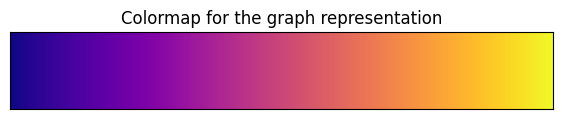

[[0.00000000e+00 1.92689365e-05 3.85378731e-05 ... 9.99961462e-01
  9.99980731e-01 1.00000000e+00]
 [0.00000000e+00 1.92689365e-05 3.85378731e-05 ... 9.99961462e-01
  9.99980731e-01 1.00000000e+00]]


In [124]:
figure, axis = plt.subplots(figsize=(7,1))
axis.set_title("Colormap for the graph representation")


in_wiki_pages = []
for i in wiki_page_length:
    #print(i[1])
    in_wiki_pages.append(i[1])

#print((max(in_wiki_pages)))
max_num_for_gradient = max(in_wiki_pages)
print(max_num_for_gradient)

gradient = np.linspace(0,1,max_num_for_gradient)
gradient = np.vstack((gradient, gradient)) # Make it 2D
axis.imshow(gradient, aspect='auto', cmap=graph_color_map)

# Remove axis ticks for a clean look
axis.set_yticks([])
axis.set_xticks([])

plt.show()
print(gradient)

In [100]:
#We created a colormap
from colorspacious import cspace_converter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib as mpl
import numpy as np

color_state_map = {-1: 'red', 0: 'black', 1: 'blue'}

states = np.random.choice([-1,0,1], size=20)
#nx.set_node_attributes(rock_artists_graph, dict(zip(rock_artists_graph.nodes(), states)), 'state')


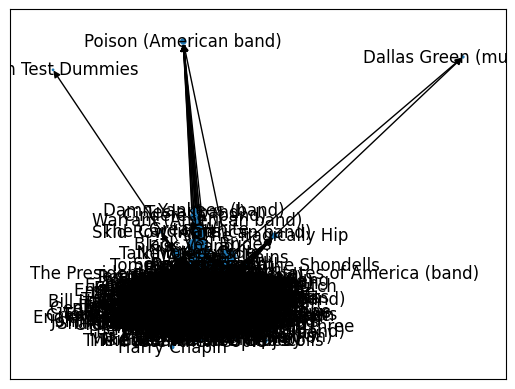

In [ ]:

#We convert our directed graph to an undirected graph and We keep the original
#We suggest that we continue the work with the original network, not with the largest component, as it was mentioned earlier, that we should work with the latter only for further analysis
undirected_rock_artist_graph = rock_artists_graph.to_undirected(reciprocal=False, as_view=True)


# nodesize = rock_artists_graph.degree
node_size_array = []
for artist in rock_artists_graph.degree():
    node_degree = artist[1]
    node_size_array.append(node_degree) 

color_map= []
for node in rock_artists_graph:
    c = nx.get_node_attributes(rock_artists_graph, word_c, "word_count")
    color_map.append(c)


pos = nx.spring_layout(rock_artists_graph)
nx.draw_networkx(rock_artists_graph, pos, node_size = node_size_array)

